# **Bala's first ML sample using fastai**

In [14]:
# get data from kaggle's fire and smoke data set 
!rm -rf kitten_or_not
import os
os.listdir(os.getcwd())
!pip install -Uqq fastai 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.3 requires absl-py~=0.10, but you have absl-py 1.0.0 which is incompatible.
tensorflow 2.6.3 requires numpy~=1.19.2, but you have numpy 1.21.5 which is incompatible.
tensorflow 2.6.3 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.3 requires wrapt~=1.12.1, but you have wrapt 1.14.0 which is incompatible.
tensorflow-transform 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tensorflow-transform 1.7.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<2.9,>=1.15.5, but you have tensorflow 2.6.3 which is incompatible.
tensorflow-serving-api 2.8.0 requires tensorflow<3,>=2.8.0, but you have tensorflow 2.6.3 which i

In [4]:
%config Completer.use_jedi = False

import os

SRC_IMAGES_DIR = '../input/d/ashutosh69/fire-and-smoke-dataset/data/data/img_data/train/'
    
def get_images(path):
    image_path = SRC_IMAGES_DIR + path
    return [os.path.abspath(os.path.join(image_path, p)) for p in os.listdir(image_path)]


fire_images = get_images('fire')
smoke_images = get_images('smoke')
# print(fire_images)

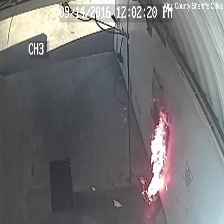

In [5]:
from fastai.vision.all import *
from fastcore.all import *
import random

im = Image.open(random.choice(fire_images))
im.to_thumb(256,256)

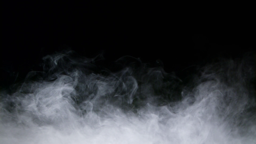

In [6]:
im = Image.open(random.choice(smoke_images))
im.to_thumb(256,256)

In [7]:
!rm -rf fire_or_not

path = Path('fire_or_not')
images = 'fire', 'smoke'

for o in images:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    resize_images(SRC_IMAGES_DIR + o, max_size=400, dest=path/o)

In [8]:
# print(path)
# os.listdir('./fire_or_not/smoke')

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

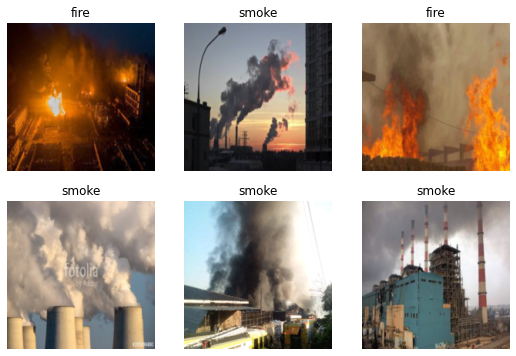

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.965861,1.377640,0.411765,00:37


epoch,train_loss,valid_loss,error_rate,time
0,0.494849,0.573402,0.176471,00:55
1,0.387482,0.584849,0.161765,00:52
2,0.302253,0.556911,0.147059,00:52


In [22]:
TEST_IMAGES_DIR = '../input/d/ashutosh69/fire-and-smoke-dataset/data/data/img_data/test/'

random_fire_image = random.choice(get_images('smoke'))
is_fire,_,probs = learn.predict(PILImage.create(random_fire_image))

print(f"This is a: {is_fire}.")
print(f"Probability it's a fire: {probs[0]:.4f}")

This is a: smoke.
Probability it's a fire: 0.0314


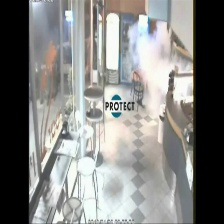

In [23]:
im=Image.open(random_fire_image)
im.to_thumb(256,256)